# **Inaugural Project**

by Cecilie Gøtterup-Hansen and Helene Thomsen - Exercise class 3

Imports and set magics:

In [122]:
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import HouseholdClass
from HouseholdClass import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **Question 1**

First we call the class form the HouseholdClass code. We make a for loop for alpha and sigma in the 9 combinations to find the optimal values of HF and HF at each combination. Using the definition of the function solve_discrete.
Based on these values we find the ratio of the home production for the female and the male. 

We illustrate by creating a table.

In [123]:
model1 = HouseholdSpecializationModelClass()

alpha_vec = np.linspace(0.25, 0.75, 3)
sigma_vec = np.linspace(0.5, 1.5, 3)

table = pd.DataFrame(index=alpha_vec, columns=sigma_vec)
for alpha in alpha_vec:
    model1.par.alpha = alpha
    for sigma in sigma_vec:
        model1.par.sigma = sigma
        # call solve function and compute HF-HM-ratio
        opt = model1.solve_discrete()
        optHF = opt.HF
        optHM = opt.HM
        ratio = opt.HF/opt.HM
        # round ratio to 2 decimal places
        ratio = round(ratio,2)
        table.loc[alpha, sigma] = ratio
        print(f'for alpha = {alpha:.2f}, sigma = {sigma:.2f} -> HF/HM ratio = {ratio:.2f}')
print("")
print("Table: HFHM ratio for given values of alpha values (left) and sigma values (top)")
print(table)


for alpha = 0.25, sigma = 0.50 -> HF/HM ratio = 0.55
for alpha = 0.25, sigma = 1.00 -> HF/HM ratio = 0.31
for alpha = 0.25, sigma = 1.50 -> HF/HM ratio = 0.21
for alpha = 0.50, sigma = 0.50 -> HF/HM ratio = 1.00
for alpha = 0.50, sigma = 1.00 -> HF/HM ratio = 1.00
for alpha = 0.50, sigma = 1.50 -> HF/HM ratio = 1.00
for alpha = 0.75, sigma = 0.50 -> HF/HM ratio = 1.83
for alpha = 0.75, sigma = 1.00 -> HF/HM ratio = 3.25
for alpha = 0.75, sigma = 1.50 -> HF/HM ratio = 4.67

Table: HFHM ratio for given values of alpha values (left) and sigma values (top)
       0.5   1.0   1.5
0.25  0.55  0.31  0.21
0.50   1.0   1.0   1.0
0.75  1.83  3.25  4.67


To avoid that a RuntimeWarning occurs warning us about the possibility of dividing by zero in our definition of H, we have bouned HM and HF at a value very close to zero in our definition of calc_utility in our HouseHoldClass.

alpha represents how productive the woman is in household production. 

For alpha = 0.5, the male and the female are equally productive in the household production. They will therefore work the same amount of hours at home. For alpha = 0.5 (meaning that the female and the male are equally productive), the value of sigma (the elasticity of substitution) does not affect the choices of hours spend at home production.

For alpha > 0.5, the female is more productive than the male in the household production. For wF = wM = 1, the female will work more hours at home relative to the male.

For alpha < 0.5, the female is less productive than the male in the household production. For wF = wM = 1, the male will work more hours at home relative to the female. 

sigma represents the degree of substitutionality between men and women's home production. The higher value of sigma, the easier it is to substitute between the labor of men and women at home.

# **Question 2**

In order to plot the log ratios of the female male production and the log wage ratio, we call the model and for looping the wage vecor for the female. We define the need log ratios of the optimal home production weight and the log wage ratio.

In [124]:
model2 = HouseholdSpecializationModelClass()

log_Hratio = []
log_wratio = []

for wF in model2.par.wF_vec:
    model2.par.wF = wF
    optimum = model2.solve_discrete()
    log_HFM = np.log(optimum.HF/optimum.HM)
    log_Hratio = np.append(log_Hratio, log_HFM)
    log_wF = np.log(wF/model2.par.wM)
    log_wratio = np.append(log_wratio, log_wF)
    print(f' For Wf = {model2.par.wF:.2f}: HF = {optimum.HF:.2f}, HM = {optimum.HM:.2f}, and log(HF/HM) = {log_HFM:2f}')

 For Wf = 0.80: HF = 5.00, HM = 4.00, and log(HF/HM) = 0.223144
 For Wf = 0.90: HF = 4.50, HM = 4.50, and log(HF/HM) = 0.000000
 For Wf = 1.00: HF = 4.50, HM = 4.50, and log(HF/HM) = 0.000000
 For Wf = 1.10: HF = 4.00, HM = 4.50, and log(HF/HM) = -0.117783
 For Wf = 1.20: HF = 4.00, HM = 5.00, and log(HF/HM) = -0.223144


Plotting the results with our specifications we can plot out the results from above.

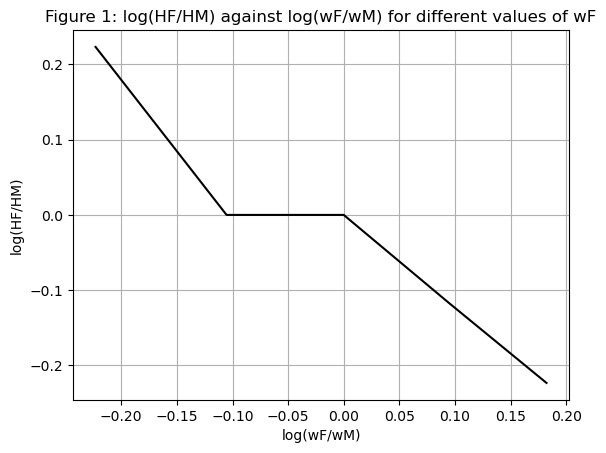

In [125]:
# create figure
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(log_wratio, log_Hratio, color='black')
# alterations to figure
ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Figure 1: log(HF/HM) against log(wF/wM) for different values of wF")
plt.show()

We see the decline in the log home production for an increase in the log in the wage ratio. This means that for an increase in the female wage, the amount of home production declines for the female. When the wage for the female and male are equal, the home production is equal for the female and male. 

# **Question 3**

We now do the same as above, but for a continuous choice set of hours worked. The continuous choice set gives us an infinite amount of possible combinations of hours worked, why the results of the maximization problem using a solver is going to be more precise.

In [126]:
model3 = HouseholdSpecializationModelClass()

# define empty vectors of log(HF/HM) and log(wF/wM)
log_Hratio = []
log_wratio = []

# calculate values of log(HF/HM) and log(wF/wM) and append values to their respective vectors
for wF in model3.par.wF_vec:
    model3.par.wF = wF
    optimum = model3.solve()
    log_HFM = np.log(optimum.HF/optimum.HM)
    log_Hratio = np.append(log_Hratio, log_HFM)
    log_wF = np.log(wF/model3.par.wM)
    log_wratio = np.append(log_wratio, log_wF)
    print(f' For Wf = {model3.par.wF:.2f}: HF = {optimum.HF:.2f}, HM = {optimum.HM:.2f}, and log(HF/HM) = {log_HFM:2f}')

 For Wf = 0.80: HF = 5.12, HM = 4.09, and log(HF/HM) = 0.223153
 For Wf = 0.90: HF = 4.75, HM = 4.27, and log(HF/HM) = 0.105368
 For Wf = 1.00: HF = 4.45, HM = 4.45, and log(HF/HM) = 0.000006
 For Wf = 1.10: HF = 4.22, HM = 4.64, and log(HF/HM) = -0.095309
 For Wf = 1.20: HF = 4.03, HM = 4.83, and log(HF/HM) = -0.182307


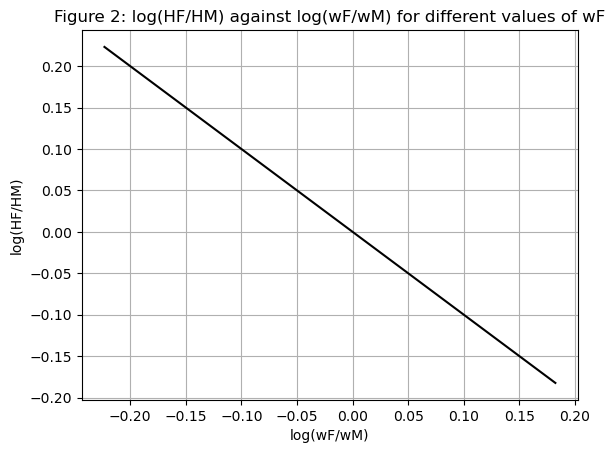

In [127]:
# create figure
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(log_wratio, log_Hratio, color='black')
# alterations to figure
ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Figure 2: log(HF/HM) against log(wF/wM) for different values of wF")
plt.show()

As expected our illustration in question 3 has a smoother curve. This is due to the ifinite combinations of hours in home production, insted of the 48 steps

# **Question 4**

Using the function estimate(), we estimate the values of alpha and sigma which minimzes the squared distance between beta0 and beta0_target and the squared difference between beta1 and beta1_target.

c:\Users\cecil\OneDrive\Skrivebord\IPNA\projects-2023-helene-and-cecilie-class-3\inauguralproject\HouseholdClass.py:175: RuntimeWarning: divide by zero encountered in divide
  x = np.log(par.wF_vec)
c:\Users\cecil\OneDrive\Skrivebord\IPNA\projects-2023-helene-and-cecilie-class-3\inauguralproject\HouseholdClass.py:63: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1))
c:\Users\cecil\OneDrive\Skrivebord\IPNA\projects-2023-helene-and-cecilie-class-3\inauguralproject\HouseholdClass.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1))


The minimizing values of (alpha, sigma) = (0.9820286655282875, 0.09997820455973572)


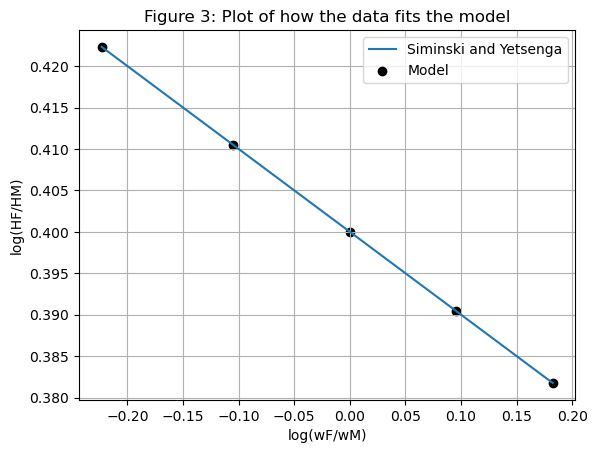

In [128]:
model4 = HouseholdSpecializationModelClass()
model4.estimate()
print(f'The minimizing values of (alpha, sigma) = {model4.estimate()}')

log_Hratio = []
log_wratio =[]

for wF in model4.par.wF_vec:
    model4.par.wF = wF
    model4.par.alpha = 0.9820286655282875
    model4.par.sigma = 0.09997820455973572
    optimum = model4.solve()
    log_HFM = np.log(optimum.HF/optimum.HM)
    log_Hratio = np.append(log_Hratio, log_HFM)
    log_wF = np.log(wF/model4.par.wM)
    log_wratio = np.append(log_wratio, log_wF)


# Siminski and Yetsenga's regression line
def f(log_wratio):
    return 0.4 +(-0.1)*log_wratio


# create figure
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
# plot Siminski and Yetsenga's results as line
ax.plot(log_wratio, f(log_wratio), label="Siminski and Yetsenga")
# plot model's results as scatter dots
ax.scatter(log_wratio, log_Hratio, label="Model",color='black')


# alterations to figure
ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Figure 3: Plot of how the data fits the model")
ax.legend()
plt.show()

We notice from the plot above that the model fit the data very well.

# **ELABORATE 4**

# **Question 5**

When women have children, on average, they experience a drop in wages (the so called 'Motherhood penalty'). According to an article in The Economist, women in Denmark who have children experience a drop in wages of 20% relative to their wage before giving birth (source: https://www.economist.com/graphic-detail/2019/01/28/how-big-is-the-wage-penalty-for-mothers)

In this part of the project, we will distinguish between couples who have children and couples who do not have children. For couples with children we reduce the female wage vector (wF_vec) with 20%.

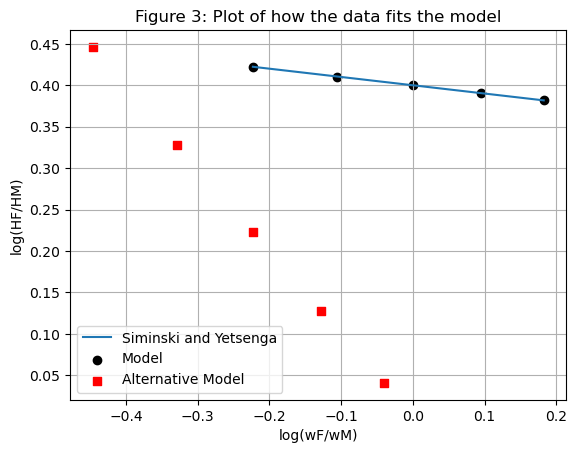

In [133]:
model5 = HouseholdSpecializationModelClass()

model5.par.wF_vec = model5.par.wF_vec*0.8

log_AltHratio = []
log_Altwratio =[]

for wF in model5.par.wF_vec:
    model5.par.wF = wF
    optimum = model5.solve()
    log_AltHFM = np.log(optimum.HF/optimum.HM)
    log_AltHratio = np.append(log_AltHratio, log_AltHFM)
    log_AltwF = np.log(wF/model5.par.wM)
    log_Altwratio = np.append(log_Altwratio, log_AltwF)

# create figure
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
# plot Siminski and Yetsenga's results as line
ax.plot(log_wratio, f(log_wratio), label="Siminski and Yetsenga")
# plot original model's results as scatter dots
ax.scatter(log_wratio, log_Hratio, label="Model",color='black')
# plot alternative model's results as scatter squares
ax.scatter(log_Altwratio, log_AltHratio, label="Alternative Model", marker='s',color='red')


# alterations to figure
ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Figure 3: Plot of how the data fits the model")
ax.legend()
plt.show()
